## 데이터 변형
### 축 색인 변경

In [6]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd

In [7]:
df=DataFrame({"name":["kim","lee","bae","cho","kang"],"sex":[1,2,2,1,1],
              "home":["마포","수지","처인","용산","종로"],"income":[250,195,325,210,274]})
num_to_str={1:"남",2:"여"}
to_city={"마포":"서울","용산":"서울","종로":"서울","수지":"용인","처인":"용인"}
df

,name,sex,home,income
0,kim,1,마포,250
1,lee,2,수지,195
2,bae,2,처인,325
3,cho,1,용산,210
4,kang,1,종로,274


### 행, 렬 인덱스 전체 수정

In [8]:
df.index=df.index.map({0:"st1",1:"st2",2:"st3",3:"st4",4:"st5"})
df.columns=df.columns.map({"name":"fn","sex":"gender","home":"house","income":"lc"})
df

,fn,gender,house,lc
st1,kim,1,마포,250
st2,lee,2,수지,195
st3,bae,2,처인,325
st4,cho,1,용산,210
st5,kang,1,종로,274


### 행, 렬 인덱스 부분 수정

In [13]:
df.rename(index={"st1":20190056,"st3":2200202},columns={"fn":"name","ic":"income"})

,name,gender,house,lc
20190056,kim,1,마포,250
st2,lee,2,수지,195
2200202,bae,2,처인,325
st4,cho,1,용산,210
st5,kang,1,종로,274


#### 객체.rename은 원본은 안바뀐다:

In [15]:
new_df=df.rename(index={"st1":20190056,"st3":2200202},columns={"fn":"name","ic":"income"})
new_df

,name,gender,house,lc
20190056,kim,1,마포,250
st2,lee,2,수지,195
2200202,bae,2,처인,325
st4,cho,1,용산,210
st5,kang,1,종로,274


#### 또는 df.rename안에 inplace 옵션으로 원본을 수정

In [18]:
df.rename(index={"st1":20190056,"st3":2200202},columns={"fn":"name","ic":"income"}, inplace=True)
df

,name,gender,house,lc
20190056,kim,1,마포,250
st2,lee,2,수지,195
2200202,bae,2,처인,325
st4,cho,1,용산,210
st5,kang,1,종로,274


### 숫자 자료의 계급화

In [20]:
np.random.seed(1234)
x=np.random.binomial(n=100,p=0.5,size=100)
cls=[35,40,45,50,55,60]
cls_x=pd.cut(x=x,bins=cls,right=True,include_lowest=True)
print(x,"\n",cls_x)

[48 52 55 48 59 52 52 44 52 48 60 51 51 39 56 46 51 50 45 46 52 47 46 59
 50 43 57 51 42 47 53 48 53 52 48 43 45 46 44 54 55 54 51 51 51 58 52 51
 43 49 53 46 54 48 59 49 48 50 58 51 43 47 49 48 47 52 45 55 57 51 55 51
 46 55 50 50 48 49 46 43 49 46 47 48 41 40 52 57 60 48 49 46 41 49 49 47
 53 45 49 53] 
 [(45.0, 50.0], (50.0, 55.0], (50.0, 55.0], (45.0, 50.0], (55.0, 60.0], ..., (45.0, 50.0], (50.0, 55.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0]]
Length: 100
Categories (5, interval[float64]): [(34.999, 40.0] < (40.0, 45.0] < (45.0, 50.0] < (50.0, 55.0] < (55.0, 60.0]]


In [22]:
pd.value_counts(cls_x)

(45.0, 50.0]      40
(50.0, 55.0]      33
(40.0, 45.0]      14
(55.0, 60.0]      11
(34.999, 40.0]     2
dtype: int64

In [23]:
cls_x=pd.cut(x=x,bins=cls,labels=["A","B","C","D","E"],right=True,include_lowest=True)
print(x,"\n",cls_x)

[48 52 55 48 59 52 52 44 52 48 60 51 51 39 56 46 51 50 45 46 52 47 46 59
 50 43 57 51 42 47 53 48 53 52 48 43 45 46 44 54 55 54 51 51 51 58 52 51
 43 49 53 46 54 48 59 49 48 50 58 51 43 47 49 48 47 52 45 55 57 51 55 51
 46 55 50 50 48 49 46 43 49 46 47 48 41 40 52 57 60 48 49 46 41 49 49 47
 53 45 49 53] 
 [C, D, D, C, E, ..., C, D, B, C, D]
Length: 100
Categories (5, object): [A < B < C < D < E]


In [25]:
np.random.seed(1234)
x=np.random.binomial(n=100,p=0.5,size=100)
cls=[35,40,45,50,55,60]
cls_x=x.qcut(x=s,q=6)
print(x,"\n",cls_x)

AttributeError: 'numpy.ndarray' object has no attribute 'qcut'

### 특이값 찾기와 제외하기

In [27]:
np.random.seed(91736481)
df=DataFrame(np.random.randn(500,4),columns=["V1","V2","V3","V4"])
df.describe()

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.018758,0.047975,-0.090514,0.020743
std,1.015213,1.024546,0.977168,1.019050
min,-3.549437,-3.063308,-3.539162,-3.038280
25%,-0.644973,-0.637535,-0.745012,-0.708521
50%,-0.014430,0.028631,-0.094483,-0.044216
75%,0.723076,0.724126,0.551119,0.718801
max,3.057405,2.788875,2.644017,3.177356


In [29]:
col=df["V3"]
col

0      0.421220
1     -1.395893
2      0.697276
3     -0.156475
4     -0.138711
5     -1.187425
6      0.874838
7     -0.017255
8      1.046568
9     -1.594786
10    -0.936185
11    -1.448511
12     1.144422
13    -0.429741
14    -0.570976
15    -0.884878
16     1.038554
17     0.512897
18    -0.750764
19    -0.698316
20    -1.122558
21     1.032467
22     0.425033
23    -0.658494
24    -0.685493
25     2.041448
26    -0.678559
27     0.830447
28    -0.811929
29    -1.108068
         ...   
470    1.400721
471   -1.112869
472   -1.435607
473   -2.155672
474   -0.747067
475    0.506531
476   -1.295665
477    0.184512
478    0.002044
479    0.299702
480   -0.947523
481    0.570998
482    2.036597
483    1.273016
484   -0.212073
485    0.168644
486   -0.510512
487    0.567955
488   -0.895000
489   -0.783266
490    0.604172
491   -1.057811
492   -0.302560
493   -0.529059
494   -0.072606
495   -0.038129
496    1.684012
497    0.281314
498   -0.917172
499    0.780954
Name: V3, Length: 500, d

#### V3 열 중에서 -3미만 또는 3 초과

In [30]:
col[np.abs(col)>3]

313   -3.179190
344   -3.062359
444   -3.539162
Name: V3, dtype: float64

#### 변수 중에서 적어도 하나라도 -3미만 또는 3 초과

In [33]:
np.abs(df).head(20)>3

,V1,V2,V3,V4
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [38]:
(np.abs(df)>3).tail(10).any(1)

490    False
491    False
492    False
493    False
494    False
495    False
496    False
497    False
498    False
499    False
dtype: bool

##### any()안에 인수는 행에 대해서 or 열에 대해서라는 의미 (default=0=행에 대해서)

In [35]:
df[(np.abs(df)>3).any(1)]

,V1,V2,V3,V4
24,-1.098383,1.336428,-0.685493,-3.038280
37,1.218235,-0.717558,0.499893,3.177356
313,1.004844,-0.539391,-3.179190,0.600409
327,-3.549437,0.823556,-0.748405,1.100264
344,0.119286,0.564931,-3.062359,1.134155
361,3.057405,-1.059384,0.125383,-1.102410
444,-0.186157,1.293776,-3.539162,0.114173
485,0.639926,-3.063308,0.168644,0.020955


#### 절대값이 3보다 큰 값들을 찾아서 대체하기

#### sign 함수: 부호 돌려줌

In [41]:
df[(np.abs(df)>3)]=np.sign(df)*3 # this means: 앞 절이 true인 경우에만 후자를 적용한다
df.tail(15)

,V1,V2,V3,V4
485,0.639926,-3.000000,0.168644,0.020955
486,-0.153664,0.762006,-0.510512,0.113470
487,-1.325963,-0.520574,0.567955,1.507101
488,0.956035,-0.716539,-0.895000,-0.788460
489,1.352106,-0.656014,-0.783266,0.088047
490,-0.645422,-0.506882,0.604172,-0.430640
491,-0.055824,2.376792,-1.057811,-1.082117
492,1.073846,-0.956670,-0.302560,0.399107
493,0.198204,-0.010786,-0.529059,0.888925
494,-0.241360,-1.038433,-0.072606,0.294006


In [42]:
df.describe() #상, 하한선이 3과 -3으로 고정됨

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.019742,0.048101,-0.088953,0.020465
std,1.011292,1.024164,0.972161,1.017751
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.644973,-0.637535,-0.745012,-0.708521
50%,-0.014430,0.028631,-0.094483,-0.044216
75%,0.723076,0.724126,0.551119,0.718801
max,3.000000,2.788875,2.644017,3.000000


## 표시자/더미변수

In [ ]:
#df.rename(index={"st1":2012313, "st3":12314},columns={""})

In [44]:
df=DataFrame({"name":["kim","lee","bae","cho","kang"],"sex":["F","M","F","M","M"],
              "home":["마포","수지","처인","용산","종로"],"income":[250,195,325,210,274]})
Gender_D=pd.get_dummies(df["sex"])
print(df["sex"],"\n",Gender_D)

0    F
1    M
2    F
3    M
4    M
Name: sex, dtype: object 
    F  M
0  1  0
1  0  1
2  1  0
3  0  1
4  0  1


#### 접두어를 지정한 변수명 생성

In [46]:
df=DataFrame({"name":["kim","lee","bae","cho","kang"],"sex":[0,1,0,0,1],
              "home":["마포","수지","처인","용산","종로"],"income":[250,195,325,210,274]})
df

,name,sex,home,income
0,kim,0,마포,250
1,lee,1,수지,195
2,bae,0,처인,325
3,cho,0,용산,210
4,kang,1,종로,274


In [47]:
pd.get_dummies(df["income"],prefix="V")

,V_195,V_210,V_250,V_274,V_325
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [48]:
pd.get_dummies(df["sex"],prefix="Gender")

,Gender_0,Gender_1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


# 자료의 시각화

#### 가상환경 설치

In [50]:
# 가상환경 설치
'''
C:\WINDOWS\system32>cd ..
C:\Windows>cd..
C:\>conda info --env
# conda environments:
#
base                  *  C:\ProgramData\Anaconda3
mypython                 C:\ProgramData\Anaconda3\envs\mypython

C:\>activate mypython
(mypython) C:\> pip install matplotlib
(mypython) C:\> pip install Seaborn
(mypython) C:\> pip install plotly
(mypython) C:\> pip install bokeh
'''

'\nC:\\WINDOWS\\system32>cd ..\nC:\\Windows>cd..\nC:\\>conda info --env\n# conda environments:\n#\nbase                  *  C:\\ProgramData\\Anaconda3\nmypython                 C:\\ProgramData\\Anaconda3\\envs\\mypython\n\nC:\\>activate mypython\n(mypython) C:\\> pip install matplotlib\n(mypython) C:\\> pip install Seaborn\n(mypython) C:\\> pip install plotly\n(mypython) C:\\> pip install bokeh\n'

In [60]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#한글 글꼴 깨질 때
from matplotlib import font_manager
font_fname='C:/Windows/Fonts/HYKANM.ttf' # fontfamily에 저장할 이름 / 한글 글꼴 넣어줘야 함
font_family=font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"]=font_family

## Matplotlib

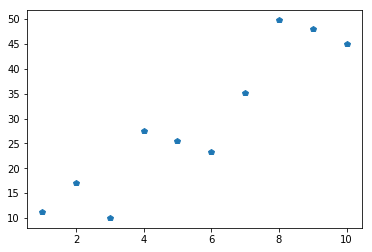

In [52]:
x=np.arange(1,11)
y=x*5+np.random.randn(10)*5

plt.plot(x,y,"p") # 산점도
plt.show() # 그래프 출력

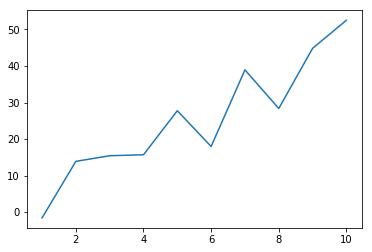

In [54]:
x=np.arange(1,11)
y=x*5+np.random.randn(10)*5

plt.plot(x,y) 
plt.show() # 그래프 출력

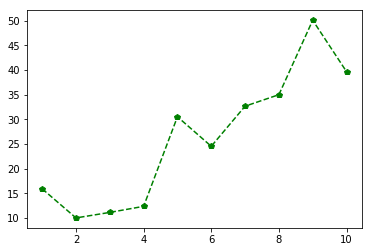

In [55]:
x=np.arange(1,11)
y=x*5+np.random.randn(10)*5

plt.plot(x,y,"gp--") # 색깔, 포인트, 줄 모양
plt.show() # 그래프 출력

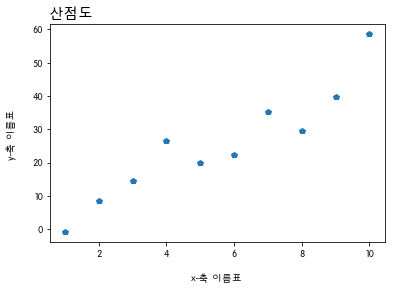

In [67]:
x=np.arange(1,11)
y=x*5+np.random.randn(10)*5
plt.plot(x,y,"p") # 산점도
plt.title("산점도", fontdict={'fontsize':15, 'fontweight':'bold'},loc='left')
plt.xlabel('x-축 이름표',labelpad=15)
plt.ylabel('y-축 이름표',labelpad=15)
plt.show() # 그래프 출력

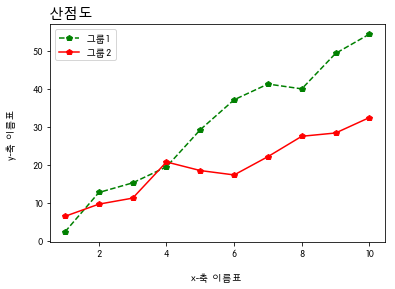

In [74]:
x=np.arange(1,11)
y1=x*5+np.random.randn(10)*5
y2=5.5+2.7*x+np.random.randn(10)*3
plt.plot(x,y1,"gp--") # 산점도
plt.plot(x,y2,"rp-") # 산점도
plt.title("산점도", fontdict={'fontsize':15, 'fontweight':'bold'},loc='left')
plt.xlabel('x-축 이름표',labelpad=15)
plt.ylabel('y-축 이름표',labelpad=15)
plt.legend(["그룹1","그룹2"])
plt.show() # 그래프 출력

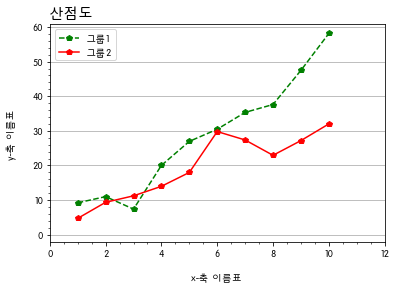

In [80]:
x=np.arange(1,11)
y1=x*5+np.random.randn(10)*5
y2=5.5+2.7*x+np.random.randn(10)*3
plt.plot(x,y1,"gp--") # 산점도
plt.plot(x,y2,"rp-") # 산점도
plt.title("산점도", fontdict={'fontsize':15, 'fontweight':'bold'},loc='left')
plt.xlabel('x-축 이름표',labelpad=15)
plt.ylabel('y-축 이름표',labelpad=15)
plt.legend(["그룹1","그룹2"])
plt.axis(xmin=0,xmax=12,ymin=-2,yma=50) # 축 크기 설정
plt.minorticks_on() #보조눈금선
plt.grid(b=True,which='major',axis='y') # 격자
plt.show() # 그래프 출력

### 막대 그래프

In [83]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/APTData.csv', header=0, skiprows=7, index_col=None,encoding='utf-8')
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


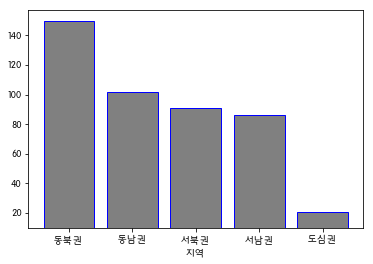

In [84]:
AreaTbl=pd.value_counts(df["Area"])
print(AreaTbl)
#막대도표
plt.bar(AreaTbl.index,AreaTbl,bottom=10,color="gray",edgecolor="blue") # 산점도
plt.xlabel("지역")
plt.show()

### 원 도표

In [85]:
print(AreaTbl)

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


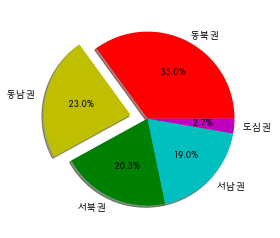

In [87]:
#원도표
plt.pie(AreaTbl,explode=(0,0.2,0,0,0), labels=AreaTbl.index, colors=["r","y","g","c","m"],autopct="%5.1f%%",shadow=True)
plt.show()

### 상자 그래프

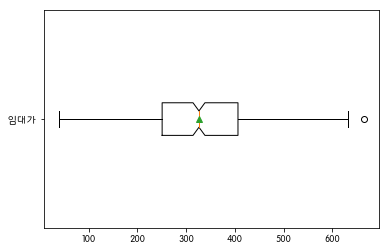

In [95]:
plt.boxplot(df["Price"], notch=True, vert=False, showmeans=True, labels={"임대가"})
plt.show()
# Price라는 변수에 대한 수직 도표
# 동그라미: 이상치

#### 평균이랑 중앙값이 거의 비슷, 대칭인 형태

### 여러 변수 그릴수도 있다

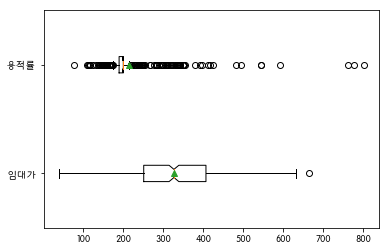

In [98]:
plt.boxplot([df["Price"],df["FAR"]], notch=True, vert=False, showmeans=True, 
            labels=["임대가","용적률"])
plt.show()

#### 용적률은 특이값이 꽤 많다 (치우친 형태)

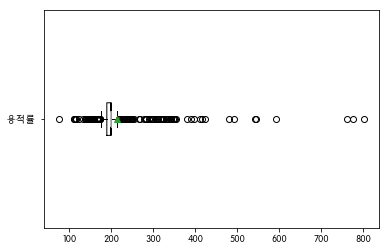

In [99]:
plt.boxplot([df["FAR"]], notch=True, vert=False, showmeans=True, 
            labels=["용적률"])
plt.show()

### 히스토그램

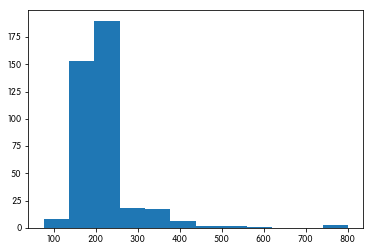

In [101]:
plt.hist(df["FAR"],bins=12)
plt.show()

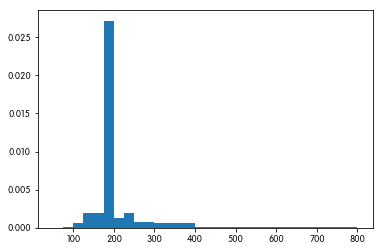

In [103]:
plt.hist(df["FAR"],bins=[50,75,100,125,150,175,200,225,250,300,400,800], density=True)
plt.show()

### 산점도: 두 변수 사이의 관계를 파악하고자 할 때 사용

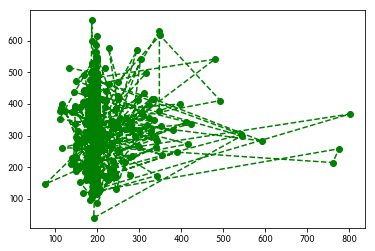

In [105]:
plt.plot(df["FAR"],df["Price"], "go--")
plt.show()

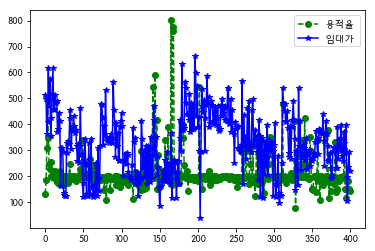

In [106]:
plt.plot(df["FAR"], "go--")
plt.plot(df["Price"], "b*-")
plt.legend(["용적율", "임대가"], loc="upper right")
plt.show()

### 영역 분할

#### 분할 영역 그래프

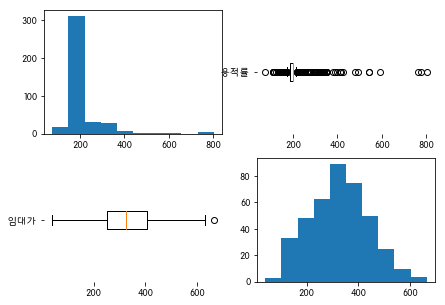

In [109]:
plt.figure(figsize=(7,5))
plt.subplot(221)
plt.hist(df.FAR, bins=10)
plt.subplot(224)
plt.hist(df.Price, bins=10)
plt.subplot(222,frameon=False)
plt.boxplot(df.FAR, vert=False, labels=["용적률"])
plt.subplot(223,frameon=False)
plt.boxplot(df.Price, vert=False, labels=["임대가"])
plt.show()

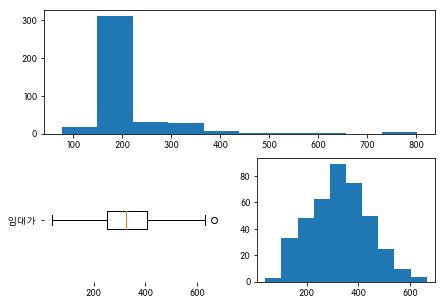

In [112]:
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.hist(df.FAR, bins=10)
plt.subplot(224)
plt.hist(df.Price, bins=10)

plt.subplot(223,frameon=False)
plt.boxplot(df.Price, vert=False, labels=["임대가"])
plt.show()

### pandas 그래프

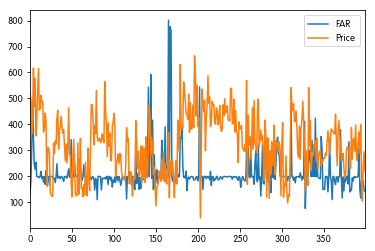

In [113]:
df.plot()

In [115]:
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


#### 변수들 중 수치형 자료인 FAR와 Price만 가지고 plot 그려준다

#### *막대그래프

In [120]:
AreaTbl=pd.value_counts(df.Area)
AreaTbl

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64

Text(0.5, 1.0, '지역 현황')

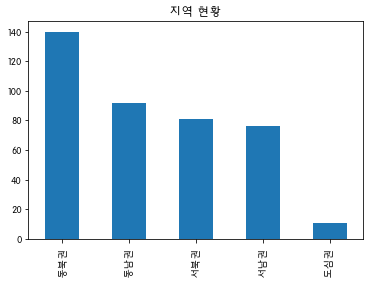

In [124]:
#AreaTbl.plot.bar() 둘 중에 취사선택
AreaTbl.plot(kind="bar")
plt.title("지역 현황")

### pandas 분할표

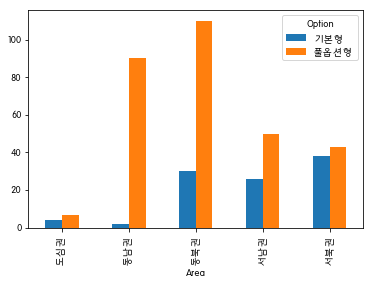

In [128]:
CrossTbl=pd.crosstab(df.Area,df.Option)
CrossTbl.plot.bar()

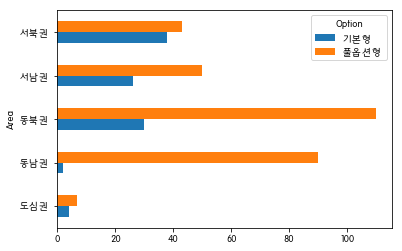

In [129]:
CrossTbl=pd.crosstab(df.Area,df.Option)
CrossTbl.plot.barh() # barh = 수평 막대도표

### pandas 원그래프

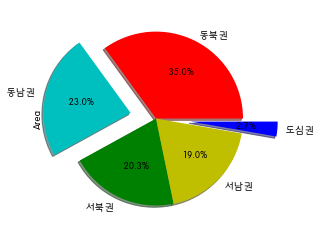

In [134]:
AreaTbl=pd.value_counts(df.Area)
AreaTbl.plot(kind="pie",explode=(0,0.3,0,0,0.4),colors=["r","c","g","y","b"],
            autopct="%5.1f%%", shadow=True)

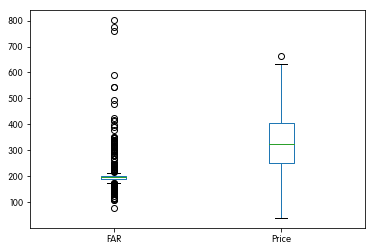

In [136]:
df.plot.box()

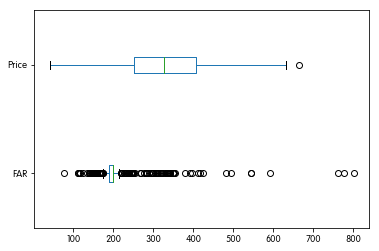

In [137]:
df.plot.box(vert=False)

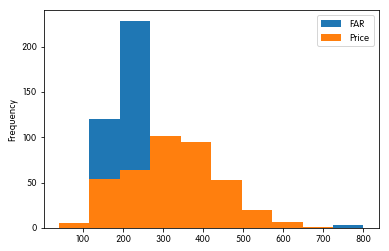

In [138]:
df.plot(kind="hist")

#### 중첩 히스토그램에서 불투명도 설정: alpha (0에 가까울수록 투명)

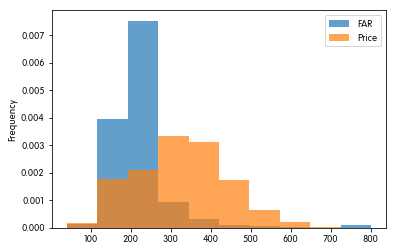

In [141]:
df.plot(kind="hist", alpha=0.7, bins=10, density=True)

### pandas 산점도

In [144]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/pilot.csv', header=0, skiprows=8, index_col=None,encoding='utf-8')
df.head(5)

,G,X1,X2,X3,X4,X5,X6
0,1,121,22,74,223,54,254
1,1,108,30,80,175,40,300
2,1,122,49,87,266,41,223
3,1,77,37,66,178,80,209
4,1,140,35,71,175,38,261


In [145]:
df=df.replace({"G":{1:"엔지니어 수습생",2:"파일럿"}})
df.head(5)

,G,X1,X2,X3,X4,X5,X6
0,엔지니어 수습생,121,22,74,223,54,254
1,엔지니어 수습생,108,30,80,175,40,300
2,엔지니어 수습생,122,49,87,266,41,223
3,엔지니어 수습생,77,37,66,178,80,209
4,엔지니어 수습생,140,35,71,175,38,261


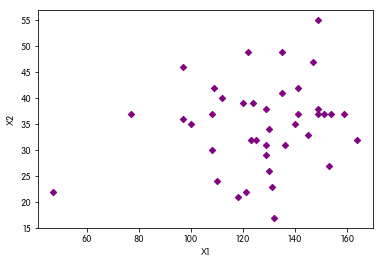

In [148]:
df.plot.scatter(x="X1",y="X2", color="purple",marker="D")

### 버블차트: 제 3 변수의 크기(e.g. z)를 산점도 점 크기/색깔에 반영하는 것

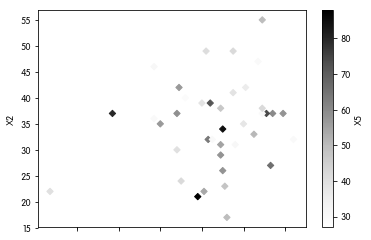

In [153]:
df.plot.scatter(x="X1",y="X2",c="X5",marker="D")

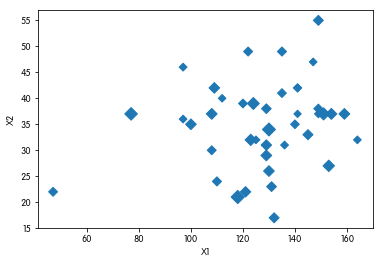

In [154]:
df.plot.scatter(x="X1",y="X2",s=df.X5,marker="D")

### pandas 영역 그래프와 선 그래프

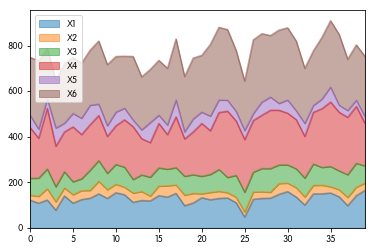

In [158]:
df.plot.area(alpha=0.5)

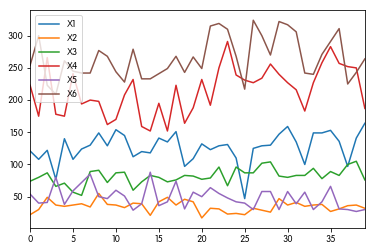

In [157]:
df.plot.line()

# Seaborn

### 막대그래프

In [163]:
import seaborn as sns

In [164]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/APTData.csv', header=0, skiprows=7, index_col=None,encoding='utf-8')
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


In [170]:
AreaTbl=pd.value_counts(df["Area"])
AreaTbl

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64

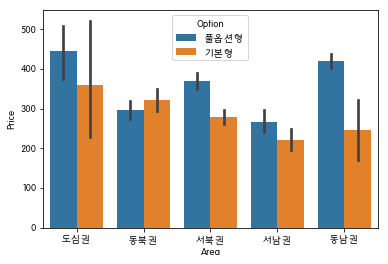

In [171]:
sns.barplot(x="Area",y="Price",hue="Option",data=df)

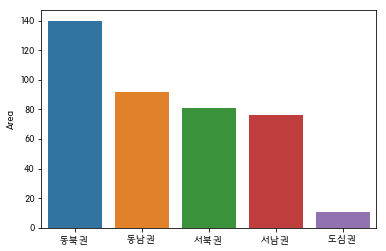

In [173]:
sns.barplot(x=AreaTbl.index,y=AreaTbl)

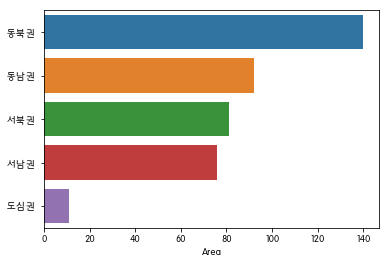

In [175]:
sns.barplot(x=AreaTbl,y=AreaTbl.index,data=df,orient="h")

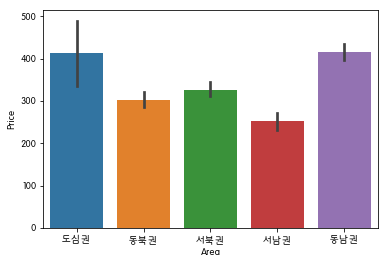

In [176]:
AreaTbl=pd.value_counts(df.Area)
AreaTbl
sns.barplot(x=df.Area, y=df.Price)

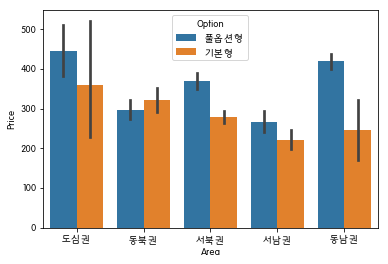

In [178]:
AreaTbl=pd.value_counts(df.Area)
AreaTbl
sns.barplot(x=df.Area, y=df.Price, hue=df.Option) # hue 지정해주면 집단 나눠줌

### seaborn 상자그래프

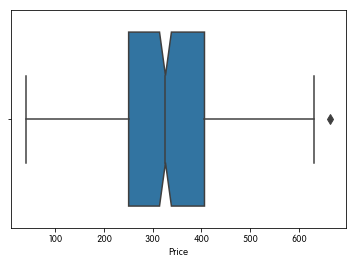

In [179]:
sns.boxplot(x="Price",data=df,orient="h",fliersize=7.5,notch=True,whis=1.5)

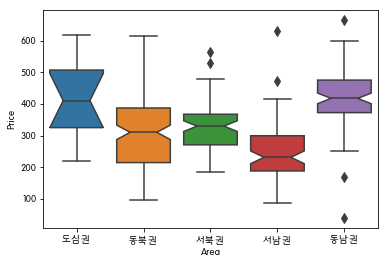

In [181]:
sns.boxplot(x=df.Area,y=df.Price,fliersize=7.5,notch=True)

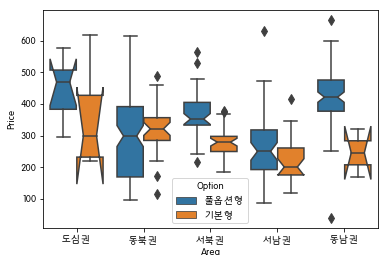

In [182]:
sns.boxplot(x=df.Area,y=df.Price,fliersize=7.5,hue=df.Option,notch=True)

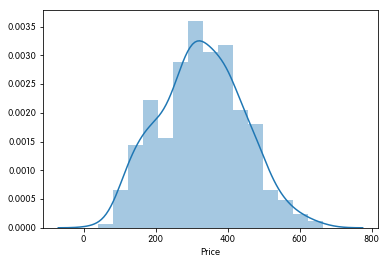

In [183]:
sns.distplot(df.Price) #디폴트가 히스토그램이랑 커널밀도곡선

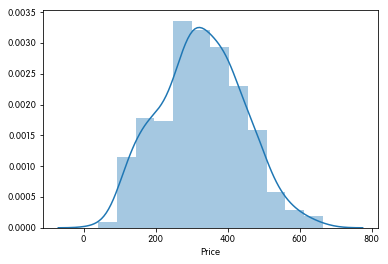

In [184]:
sns.distplot(df.Price,bins=12) # 옵션으로 막대 수 조정

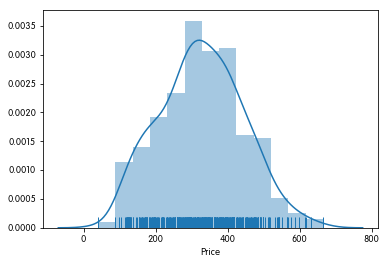

In [185]:
sns.distplot(df.Price, bins=13, rug=True) # rug: 밑에 자료의 밀집 정도를 표현 (정규분포 형태를 보이고 있다)

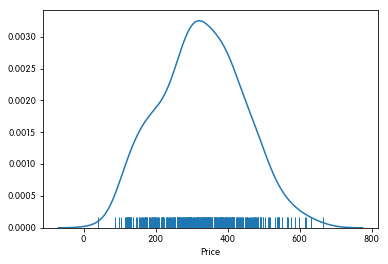

In [186]:
sns.distplot(df.Price, hist=False,bins=13, rug=True) # 밀도곡선만 나타낼 수도 있다

### Seaborn 산점도와 회귀직선

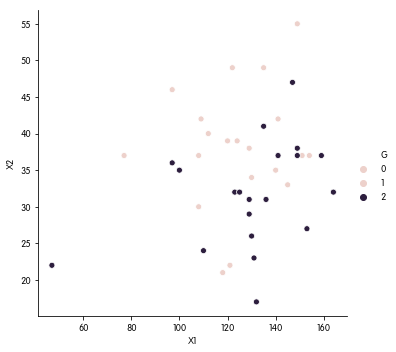

In [200]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/pilot.csv', header=0, skiprows=8, index_col=None,encoding='utf-8')
sns.relplot(x="X1", y="X2", hue="G", data=df,kind="scatter")

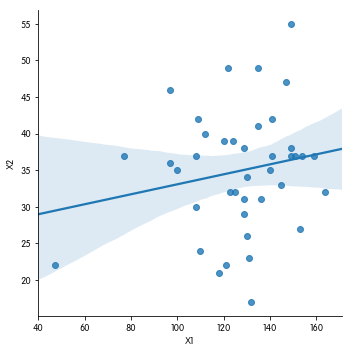

In [201]:
sns.lmplot(x="X1",y="X2",data=df)

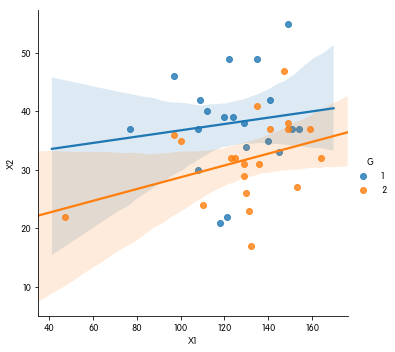

In [202]:
sns.lmplot(x="X1",y="X2", hue="G",data=df)

### Seaborn pairplot

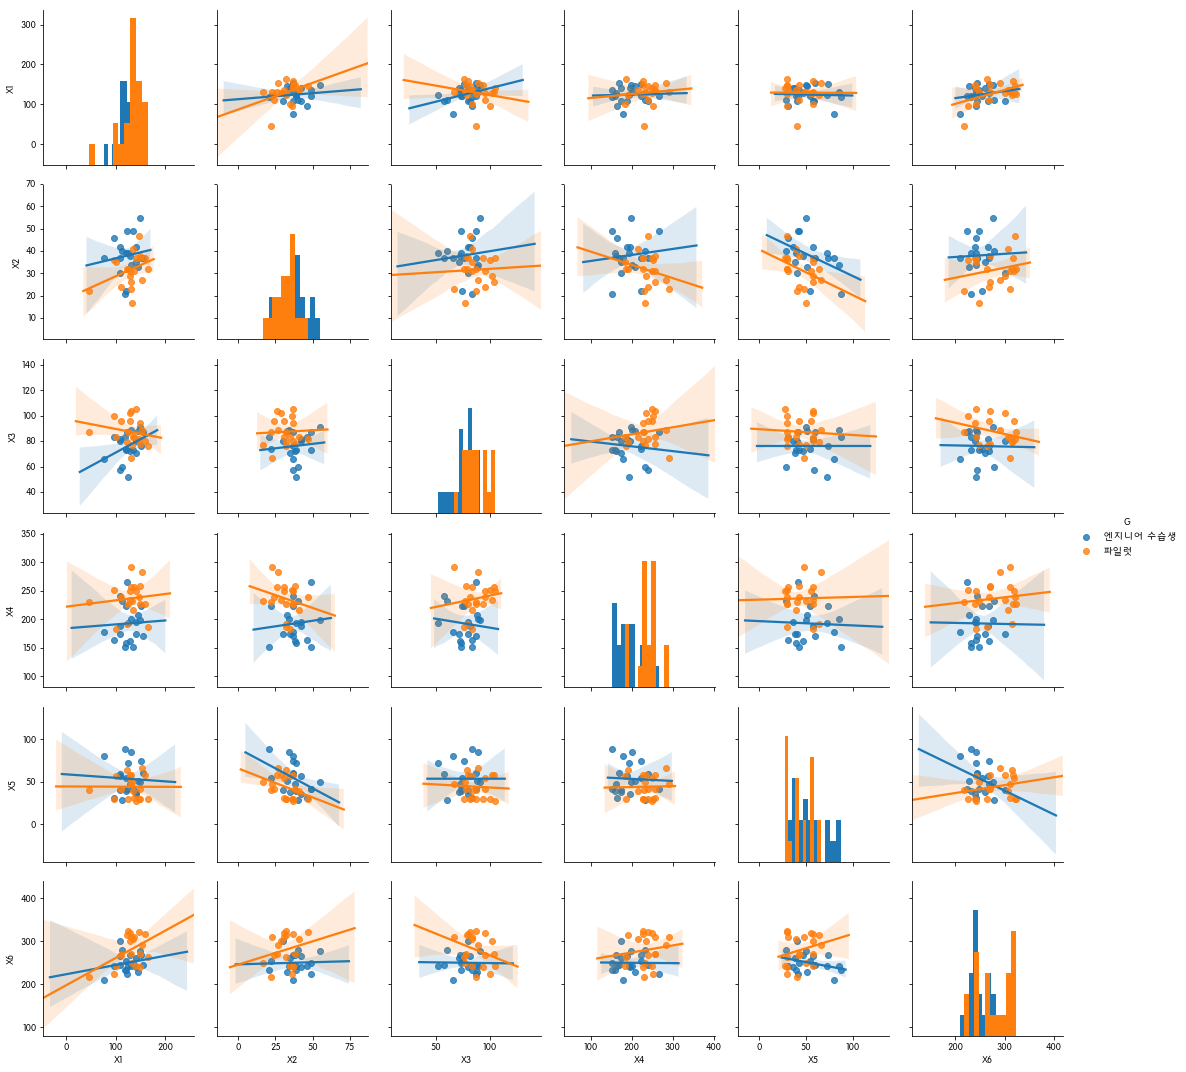

In [205]:
df=df.replace({"G":{1:"엔지니어 수습생",2:"파일럿"}})
sns.pairplot(data=df, hue="G", kind="reg", diag_kind="hist")

### jointplot

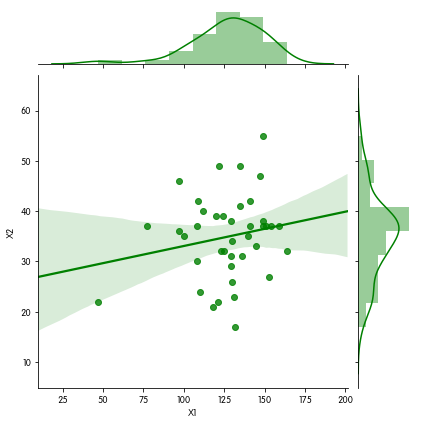

In [206]:
sns.jointplot(x="X1",y="X2",data=df,kind="reg",color="g")

# Plotly

### 원 그래프

In [208]:
import plotly.graph_objs as go
import plotly as ply

In [209]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/APTData.csv', header=0, skiprows=8, index_col=None,encoding='utf-8')

In [211]:
data=[go.Pie(text=AreaTbl.index,values=AreaTbl.values,opacity=0.7)]
layout=go.Layout(title="원그래프")
figure=go.Figure(data=data, layout=layout)
ply.offline.plot(figure,filename='C:/Users/Affinity/Desktop/Python_Data/ch02_data/piechart.html')

'C:/Users/Affinity/Desktop/Python_Data/ch02_data/piechart.html'

### 바 그래프

In [213]:
data=[go.Bar(x=AreaTbl.index,y=AreaTbl.values)]
layout=go.Layout(title="바그래프")
figure=go.Figure(data=data, layout=layout)
ply.offline.plot(figure,filename='C:/Users/Affinity/Desktop/Python_Data/ch02_data/barchart.html')

'C:/Users/Affinity/Desktop/Python_Data/ch02_data/barchart.html'

### 상자 그래프

In [215]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/APTData.csv', header=0, skiprows=7, index_col=None,encoding='utf-8')
data=[go.Box(x=df.Area,y=df.Price,boxmean=True, fillcolor="yellow",jitter=True,notched=True)]
layout=go.Layout(title="상자그래프")
figure=go.Figure(data=data, layout=layout)
ply.offline.plot(figure,filename='C:/Users/Affinity/Desktop/Python_Data/ch02_data/boxplot.html')

'C:/Users/Affinity/Desktop/Python_Data/ch02_data/boxplot.html'

In [216]:
data=[go.Histogram(x=df.Price,nbinsx=15,opacity=0.5,text="개")]
layout=go.Layout(title="히스토그램")
figure=go.Figure(data=data, layout=layout)
ply.offline.plot(figure,filename='C:/Users/Affinity/Desktop/Python_Data/ch02_data/histogram.html')

'C:/Users/Affinity/Desktop/Python_Data/ch02_data/histogram.html'

# Bokeh

In [217]:
from bokeh.plotting import figure, output_file, output_notebook, show

In [219]:
df=pd.read_csv('C:/Users/Affinity/Desktop/Python_Data/ch02_data/APTData.csv', header=0, skiprows=7, index_col=None,encoding='utf-8')
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


#### 늘 그렇듯 빈도표를 먼저 만들고,

In [220]:
AreaTbl=pd.value_counts(df["Area"])
AreaTbl.index

Index(['동북권', '동남권', '서북권', '서남권', '도심권'], dtype='object')

In [221]:
output_notebook()

Loading BokehJS ...

In [222]:
p=figure(title="막대그래프",x_axis_label='x',y_axis_label='y')

In [223]:
p.hbar(y=[1,2,3,4,5],height=0.5,right=AreaTbl.values)

GlyphRenderer(id='1041', ...)

In [224]:
show(p)